In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) # Create a tensor of n x 2. Since we passed in 2 parameters, we get a rank 2 tensor (matrix)
x[:,0].uniform_(-1.,1) # Take column 0 and replace it with a random number between 0 and 1. 
x[:5] # Print out the first 5 rows. 

tensor([[ 0.0844,  1.0000],
        [-0.6264,  1.0000],
        [-0.9509,  1.0000],
        [ 0.4755,  1.0000],
        [-0.0712,  1.0000]])

Note that in pytorch, any function ending with a _ means instead of returning that value, we want to replace what ever we called the function on with the output of that function. 

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)

`x@a` means a matrix product, it is more general than that and can be a vector vector product.   
`torch.rand(n)` returns an array of n random numbers. 

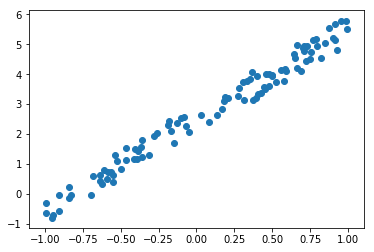

In [6]:
plt.scatter(x[:,0], y); # Scatter plot my xs by my ys

You want to find **parameters** (weights/coefficients) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [14]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

y_hat (written ŷ ) is the predicted value of y (the dependent variable, as plotted against x in the scatter graph above) in our regression equation. 

Here both y and y_hat are vectors, so - performs element wise subtraction, we then can get the mean of the squared errors, giving us a scalar representing how wrong our solution was. 

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error. Not that `a[0]` is our gradient and `a[1]` is our intercept.

In [56]:
a = tensor(-1.,1) # Adding a dot to any of them, converts all value to floats

In [57]:
y_hat = x@a
mse(y_hat, y)

tensor(9.1781)

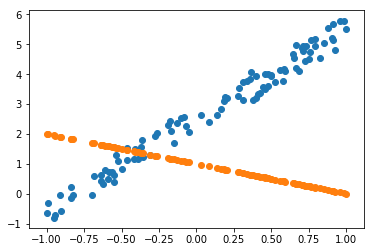

In [58]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [63]:
a = nn.Parameter(a); a

Parameter containing:
tensor([3.0389, 2.4916], requires_grad=True)

In [67]:
def update():
    y_hat = x@a # Calculate a prediction 
    loss = mse(y, y_hat) # Calculate the loss
    if t % 10 == 0: print(loss)
    loss.backward() # Calculate the derivative 
    with torch.no_grad():
        a.sub_(lr * a.grad) # Subtract the gradient from a
        a.grad.zero_()

In [68]:
lr = 1e-1
for t in range(100): update()

tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)


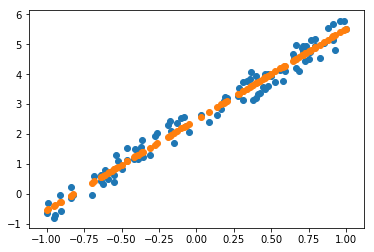

In [72]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@(a.detach().numpy()));

## Animate it!

In [73]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [76]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@(a.detach().numpy()))
plt.close()

def animate(i):
    update()
    line.set_ydata(x@(a.detach().numpy()))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.
As calculating the loss for a whole dataset at once, every time would be very costly, we can pick a random batch of say 64 data items. Therefore adding randomness to the process making it stocastic. 

## Vocab

- Learning rate

   What we multiply our gradient by when deciding how much to update our weights by. 


- Epoch

   One complete run through all of our data points. For non-stocastic gradient descent this means going though every one of our possibly very large dataset. The more epochs you do, the more times you see that same peice of data, therefore improving the chance of overfitting to it. 
   
   
- Minibatch

   Random bunch of points used to update your weights. 
   

- SGD

   Gradient descent that uss mini batches. 
   

- Model / Architecture

   In this case its $ y = Xa $, the mathematical function we are fitting the parameters of. 



- Parameters

   The variables in the model we are updating. 



- Loss function

   A function that tells you how far away or close you are to the correct paramaters which minimise this loss. 

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

# A note on overfitting

![A note on overfitting](https://miro.medium.com/max/2512/0*tAHgUC2bqm0nefpg.PNG)

You may think that the key to stopping it overfitting would be to keep the model, a low power polynomial. 
Keep the number of parameters low. However Jeremy Howard, says the key is actually regularization - using a validation set and making sure the prediction results work for this validation set. 